In [1]:
# get tweet from twint 
# prep raw text 

# do tokenize
# do vertorize 
# perform clustering
# show cluster 

# visual clusters
# interprete cluster 
# compare with searching "terms"

# problem statement
# explain all data from searching "terms"
# explian code and cbomments
# show visuals 
# explain interpretion 


# techniuqe 
# N-Gram
# K-Mean
# PCA/LDA

# Guessing & Seeing the Cannabis Clusters through Twitter data

### Purpose

- text clustering implementation by tweet text 
- to see the clusters/groups of the canabis via twitter data 
- to extract information from each cluster to identify sinificantly 

### Overview 

- Data(Text) Exploring
- Text preprocessing 
- Text Clustering 
- Cluster description  
- Challenge and Future work

## Garbage In : Garbage Out

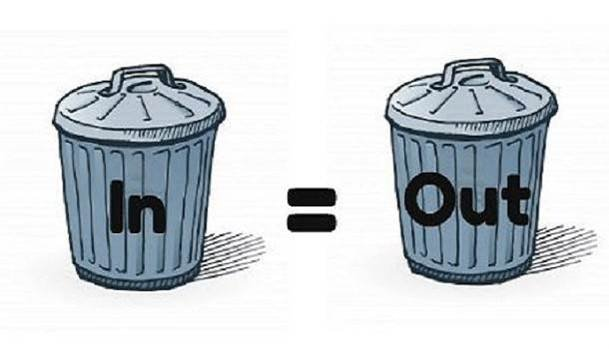

## คำไทย/คำไท

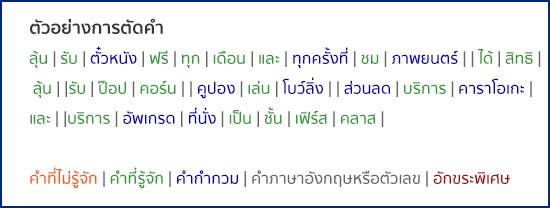

In [72]:
# image from https://perth.medium.com/ตัดคำไทยด้วย-nlp-ใช้-library-vs-api-fd53615203f9

In [7]:
import os
print (os.environ['CONDA_DEFAULT_ENV'])

base


In [8]:
!which python

/Users/prachy/opt/miniconda3/bin/python


# SetUp

In [9]:
import os
import math
import pandas as pd
import numpy as np
import marisa_trie
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import re
import texthero as hero
import seaborn as sns

from wordcloud import WordCloud
from collections import Counter

from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.decomposition import PCA, LatentDirichletAllocation

from nltk.corpus import stopwords, words
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer

from pythainlp.corpus import thai_stopwords 
from pythainlp.tokenize import word_tokenize
from pythainlp.corpus.common import thai_words
from pythainlp.util import normalize,isthai,isthaichar,find_keyword
from pythainlp import word_vector, sent_tokenize
from pythainlp.summarize import summarize
# from pythainlp.summarize import extract_keywords

%matplotlib inline

In [10]:
import nltk
nltk.download('wordnet')
nltk.download('words')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /Users/prachy/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to /Users/prachy/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/prachy/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [11]:
def change_matplotlib_font(font_download_url):
    FONT_PATH = 'MY_FONT'
    
    font_download_cmd = f"wget {font_download_url} -O {FONT_PATH}.zip"
    unzip_cmd = f"unzip -o {FONT_PATH}.zip -d {FONT_PATH}"
    os.system(font_download_cmd)
    os.system(unzip_cmd)
    
    font_files = fm.findSystemFonts(fontpaths=FONT_PATH)
    for font_file in font_files:
        fm.fontManager.addfont(font_file)

    font_name = fm.FontProperties(fname=font_files[0]).get_name()
    matplotlib.rc('font', family=font_name)
    print("font family: ", plt.rcParams['font.family'])

In [12]:
font_download_url = "https://fonts.google.com/download?family=Noto%20Serif%20Thai"
change_matplotlib_font(font_download_url)

--2022-11-13 09:38:10--  https://fonts.google.com/download?family=Noto%20Serif%20Thai
Resolving fonts.google.com (fonts.google.com)... 2404:6800:4001:80f::200e, 172.217.166.142
Connecting to fonts.google.com (fonts.google.com)|2404:6800:4001:80f::200e|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘MY_FONT.zip’

     0K .......... .......... .......... .......... ..........  404K
    50K .......... .......... .......... .......... ..........  631K
   100K .......... .......... .......... .......... .......... 1.41M
   150K .......... .......... .......... .......... .......... 1.74M
   200K .......... .......... .......... .......... .......... 2.02M
   250K .......... .......... .......... .......... .......... 2.50M
   300K .......... .......... .......... .......... .......... 2.41M
   350K .......... .......... .......... .......... .......... 4.42M
   400K .......... .......... .......... .......... .......... 4.1

Archive:  MY_FONT.zip
  inflating: MY_FONT/OFL.txt         
  inflating: MY_FONT/static/NotoSerifThai_ExtraCondensed/NotoSerifThai_ExtraCondensed-Thin.ttf  
  inflating: MY_FONT/static/NotoSerifThai_ExtraCondensed/NotoSerifThai_ExtraCondensed-ExtraLight.ttf  
  inflating: MY_FONT/static/NotoSerifThai_ExtraCondensed/NotoSerifThai_ExtraCondensed-Light.ttf  
  inflating: MY_FONT/static/NotoSerifThai_ExtraCondensed/NotoSerifThai_ExtraCondensed-Regular.ttf  
  inflating: MY_FONT/static/NotoSerifThai_ExtraCondensed/NotoSerifThai_ExtraCondensed-Medium.ttf  
  inflating: MY_FONT/static/NotoSerifThai_ExtraCondensed/NotoSerifThai_ExtraCondensed-SemiBold.ttf  
  inflating: MY_FONT/static/NotoSerifThai_ExtraCondensed/NotoSerifThai_ExtraCondensed-Bold.ttf  
  inflating: MY_FONT/static/NotoSerifThai_ExtraCondensed/NotoSerifThai_ExtraCondensed-ExtraBold.ttf  
  inflating: MY_FONT/static/NotoSerifThai_ExtraCondensed/NotoSerifThai_ExtraCondensed-Black.ttf  
  inflating: MY_FONT/static/NotoSerifThai_Con


   750K .......... .......... .......... .......... .......... 5.88M
   800K .......... .......... .......... .......... .......... 6.59M
   850K .......... .......... .......... .......... .......... 14.4M
   900K .......... .......... .......... .......... .......... 6.96M
   950K .......... .......... .......... .......... .......... 5.03M
  1000K .......... .......... .......... .......... .......... 17.4M
  1050K .......... .......... .......... .......... .......... 6.32M
  1100K .......... .......... .......... .......... .......... 18.5M
  1150K .......... .......... .......... .......... .......... 7.42M
  1200K .......... .......... .......... .......... .......... 62.9M
  1250K .......... .......... .......... .                     79.4M=0.5s

2022-11-13 09:38:11 (2.74 MB/s) - ‘MY_FONT.zip’ saved [1312547]



In [13]:
pd.set_option('display.max_colwidth', None)

# Load Data

In [14]:
!ls 

MY_FONT               THSarabunNew          play
MY_FONT.zip           ThaiTextUtility       sna-project2.ipynb
README.md             piti                  tweet_token_clean.csv


In [15]:
raw_data1 = pd.read_csv('play/output.csv') # search by keyword กัญชาเสรี
raw_data2 = pd.read_csv('piti/output4.csv') # search by keyword กัญชาการแพทย์

In [16]:
raw_data2_tweet=raw_data2[['tweet']]

In [114]:
raw_data1.head()

tweet
0    OPEN!! #อัดแท่ง #กรีนแคก  ยกโล,ครึ่งโล,ขีด มีราคาส่งพ่อค้า Line : wkpy1512 #เพชรเกษม #ท่าพระ #จรัญ #บางแค #จอมทอง #ดาวคะนอง #ประชาอุทิศ #สุขสวัสดิ์ #พระราม2 #มหาชัย #กระทุ่มแบน #สมุทรสาคร #สายเขียว #กัญชา #กัญชากรุงเทพ #กัญชาอัดแท่ง #กัญชาออแกนิค #กัญชาog #กัญชาราคาส่ง #เนื้อ  https://t.co/067Xz8ibR9
1                        OPEN!! #อัดแท่ง เมาๆ ไม่รา #กรีนแคก เหนียวๆ ไม่สาบ ยกโล,ครึ่งโล,ขีด มีราคาส่งพ่อค้า Line : wkpy1512 ไม่ซื้อทักถามก็ยังดี #เนื้อ #กัญชา #กรีนแครก #กัญชาออแกนิก #กัญชาอัดแท่ง #กัญชากทม #กัญชากรุงเทพ #กัญชาส่งด่วน #ส่งGrab #ส่งEMS #ฝั่งธนชนมือ #สายเมา #สายตี้  https://t.co/r3rJoGBE4A
2                                                                                                                                                                                                                                                                       เมาควันกัญชาเเระอิเหี้ยมึนขนาดดมไปนิดเดียว
3                                                                                      "ศุภชัย​ ใจ​สมุทร"พรรค​ภูมิใจ​ตาย​ ออกมาขู่​"การตัดสินใจ​ของพวกท่าน​ ถ้าพรบ.กัญ​ชา​ไม่ผ่านอาจต้องยุบสภา​ Cr.เมือง​ไทย​ใน​กะลา​ #กัญชาเสรี #พรรคภูมิใจตาย เรื่องเหี้ยๆไว้ใจได้พรรค​ภูมิใจ​ตาย​😡😡😡😡😡  https://t.co/XDFnFPo7dP
4  สวัสดีวันลอยกะทงครับ @ไลน์  https://t.co/1hryFTS0mj  ✅✅ #กัญชา #สายเขียว #ดอกog #weed #thc #exotic #ขายกัญชา #พันลํา #พันลําog #กัญชา #กัญชา  #กัญชาog #กัญชาออแกนิค #กัญชานนทบุรี #กัญชากรุงเทพ #กัญชากทม #กัญชาไทย #กัญชานอก #กัญชาบางบัวทอง #นอนไม่หลับ #กัญชาไทรน้อย #กัญชาบางใหญ่  https://t.co/2kuKGvUaKZ

In [115]:
raw_data2.head()

Unnamed: 0                   id      conversation_id    created_at  \
0           0  1589928392811778049  1589922892506357762  1.667900e+12   
1           1  1589922275578765312  1589922275578765312  1.667900e+12   
2           2  1589769362269167616  1589462395055112192  1.667870e+12   
3           3  1589556301587415041  1588192716692672512  1.667810e+12   
4           4  1588969160956350464  1588969160956350464  1.667670e+12   

                  date  timezone  place  \
0  2022-11-08 10:30:42         0    NaN   
1  2022-11-08 10:06:24         0    NaN   
2  2022-11-07 23:58:47         0    NaN   
3  2022-11-07 09:52:09         0    NaN   
4  2022-11-05 18:59:04         0    NaN   

                                                                                                                                                                                                                                                                                                                                               tweet  \
0                                                                                                                                                                                                                   @KhaosodOnline ดูดกัญชาโพสต์สื่อเป็นว่าเล่น แถมอุปกรณ์หลอดแก้วสารพัด สรุปกัญชาการแพทย์หรือกัญชาในการเสพ หยุดได้แล้วความคิดแบบนี้   
1                                                                                                                                                                                              ศูนย์รวมคีย์เวิร์ด คำตอบ ปัญหาจุดบอดกฏหมายเยาวชน กัญชาการแพทย์ ภัยความมั่น สังคมครอบครัว ครบบบ  #เด็ก18ฆ่าเด็ก13 #โหนกระแส    https://t.co/km47ieuav5   
2                                               @Top_Watt คุณไม่รู้จักและเข้าใจไง ว่าคนใช้กัญชาไม่ได้แปลว่าจะป่วยเป็นจิตเวชกันไปหมด ผมถึงถามว่าในประชาธิปัตย์ มีใครเคยมีประสบการณ์บ้าง? หรือ นั่งเทียนเขียนเอาครับ? เพราะยังไม่รู้จักด้วยซ้ำว่ากัญชาการแพทย์ใช้วิธีดูดดอกช่อได้. กระแสนิยมโลกกำลังหนุน นโยบายมันถึงมาได้จนทุกวันนี้ยังไงละครับ 🤷🏻‍♂️   
3  @JezusHashSoOP @PaknamM @manopsi หาเสียงมาด้วยทั้งการแพทย์ และ สันทนาการมา ตอนทำจริงไม่ได้สนับสนุนสันทนาการไงเข้าใจการเมืองไหม? เพราะพวกหน้าโง่และสังคมห่วยแตกยังไม่รู้จักว่ากัญชาการแพทย์ ก็รวมการดูดด้วย. กม.ตอนนี้ก็ห้ามใช้ดูดในที่สาธารณะ. ปัจจุบันที่มีนี่รู้บ้างป่าวว่า ดอกช่อที่ใช้ดูดไม่ได้เป็นส่วนแบ่งใหญ่สุด??  https://t.co/VxfRSe2XVH   
4                                                              1759เบื้องหลัง🇩🇪ซบ🇨🇳เพราะ🇺🇸เห็นแก่ตัวปัดภาระผู้ลี้ภัย🇺🇦+ฮุบกิจการสำคัญ🇶🇦FIFAเตือน32ประเทศอย่าเอาการเมืองมาเกี่ยวข้อง⚽เปิดแผนกัญชาการแพทย์ปี66🏥BM.2อาจเกิดจาก💊โมลนูพิราเวียร์ 🇹🇭ปชป เอาเวลาทำงานด้านพาณิชย์-การเกษตรส่งออก @JohnHorneUK  @mentaldegagnant      https://t.co/G8JJEmG1DJ   

  language                         hashtags  ... geo  source  user_rt_id  \
0       th                               []  ... NaN     NaN         NaN   
1       th  ['เด็ก18ฆ่าเด็ก13', 'โหนกระแส']  ... NaN     NaN         NaN   
2       th                               []  ... NaN     NaN         NaN   
3       th                               []  ... NaN     NaN         NaN   
4       th                               []  ... NaN     NaN         NaN   

  user_rt retweet_id  \
0     NaN        NaN   
1     NaN        NaN   
2     NaN        NaN   
3     NaN        NaN   
4     NaN        NaN   

                                                                                                                                                                                                             reply_to  \
0                                                                                                                                             [{'screen_name': 'KhaosodOnline', 'name': 'ข่าวสด', 'id': '266946216'}]   
1                                                                                                                                                                                                           

# Data Exploring 

In [19]:
raw_data1.shape

(9219, 1)

In [20]:
raw_data2.shape

(100, 39)

In [21]:
raw_data1.columns=['tweet']

In [22]:
df = pd.concat([raw_data1, raw_data2_tweet], ignore_index=True).drop_duplicates().reset_index(drop=True)

In [23]:
backup_df = df.copy()

In [24]:
backup_df.sample(5)

tweet
7766  หอมได้ทุกที่ เมาได้ทุกวัน🌷  #Muhameds​ #กัญชา #กัญชาอัดแท่ง #กัญชาออแกนิค #weedsmokers #สหายสายเขียว #สายเขียว #สายเมา #สายปุ้น #กัญชาเชียงใหม่ #vape #กัญชากรุงเทพ #ขายกัญชา #thc #ดอกกัญชา #น้ำมันกัญชา #thaicannabis​ #weedthailand #cbd #ปากกากัญชา #เยลลี่กัญชา #พันลําog #OG  https://t.co/k4k7NjFWEo
4780                                                                                                                                                                                                                                                                    อ้าวงง ละกัญชาไม่ห่วงบ้างหร๋ออออมมคุณพรี่
6124                                                                             สมัยรัฐบาลยิ่งลักษณ์เปลี่ยนกฎให้เด็กไว้ผมยาวได้ แจกไอแพดฟรี ครูมัธยมกูด่าจะเป็นจะตาย ทำเหมือนเป็นเรื่องที่ร้ายแรงมาก ยกเหตุผลไร้สาระร้อยแปดมาด่า ดูรัฐบาลยุคนี้ปลดกัญชาเสรี ทั้งที่ไม่จำเป็นแล้วแม่งโคตรอันตราย แต่เงียบหมดอิสัส
3618              น้องใหม่✨Pre-Rolls JEETER พันลำมินิตัวละ 0.5 กรัม ในกระปุกมี 5 ตัว เคลิ้มกัญยาวๆ😚   สายอินดิก้าเหมาะสำหรับผู้ที่ต้องการ High ทะลุมิติ👽  - ผ่อนคลายจากงานหนัก 😄🥳 - ลดอาการเจ็บปวด 🥰😃 - หลับสนิท หลับสบาย 😌😇 - เจริญอาหาร 🤤😋 #กัญชานอก  #กัญชาเสรี #กัญชาog  #กัญชาไฟฟ้า  https://t.co/zEJfpeB304
7435      @Thairath_News นี่เพียงน้ำจิ้มเท่านั้นแหละ มีมากกว่านี้เยอะ ฮุบของกลาง ทั้งยาบ้า ยาไอซ์ กัญชา ยิ่งถ้าลุยบ่อนด้วยแล้ว เงินของกลางหายไปเยอะ ตำรวจไทยสมัยนี้ผิดกว่าเดิม ไม่ได้หมายความดีกว่าเดิม เหี้ยกว่าเดิม ตั้งแต่รุ่นไอ้ัวเกรียน มาจนถึงรุ่นที่ผ่านมา จะมาดีตอนต้นก็รุ่นนี้ และอย่าเพิ่งไว้ใจนะ  เหอะ

# Text PreProcessing

In [25]:
# import os
# import deepcut
# import re
# from fuzzywuzzy import fuzz

# class ThaiTextUtility:

#     def __init__(self):
#         self.word_list = []
#         self.load_dict()

#     def load_dict(self):
#         dict_path = ['ThaiTextUtility', 'thaiword.txt']
#         dict_path = os.sep.join(dict_path)
#         dict_file = open(dict_path, encoding='utf-8')
#         for word in dict_file:
#             word = word.rstrip()
#             self.word_list.append(word)

#     def lemmatize(self,text):
#         text = re.sub(r'(.)\1+', r'\1\1', text)
#         text_token = deepcut.tokenize(text)
#         for word in text_token:
#             if word in self.word_list:
#                 print(word)
#             else:
#                 for cursor in self.word_list:
#                     fuzz_ratio = fuzz.ratio(word, cursor)
#                     if fuzz_ratio > 85:
#                         print('sugguestion of '+word+' : '+cursor)
                        
# thai_text_util = ThaiTextUtility()

# test_phrase1 = 'ผมก็เออออกับเขาไปเรื่อย'
# test_phrase2 = 'ไปเที่ยวสนุกมากกกกกกกกกกกกกกกกก'

# # print('###########################')
# # thai_text_util.lemmatize(test_phrase1)
# print('###########################')
# thai_text_util.lemmatize(test_phrase2)
# print('###########################')

In [26]:
tags = [tag for tag in raw_data2['hashtags'] if len(tag)!=0]

In [27]:
import ast

tag_dict={}
for tag in tags:
    # fix 20220918: return to string representation as list
    tag=ast.literal_eval(tag)
    for name in tag:
        if name not in tag_dict:
            tag_dict[name] = 1
        else:
            tag_dict[name] = tag_dict[name]+1

In [28]:
tag_df=pd.DataFrame(list(tag_dict.items()),columns=['tag_name','count']).sort_values('count', ascending=False)

<AxesSubplot:xlabel='count', ylabel='tag_name'>

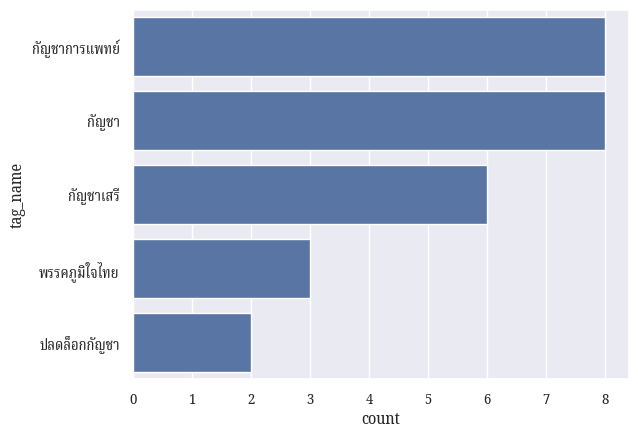

In [29]:
sns.set_theme(style="whitegrid")
sns.set(font="Noto Serif Thai Condensed")
sns.barplot(x="count", y="tag_name", data=tag_df[:5], color="b")

In [30]:
corpus_df=list(set(tag_df['tag_name'].to_list()))

In [31]:
print(corpus_df)

['กัญชาทางการแพทย์', 'ข่าวออนไลน์ช่อง8', 'สายเขียว', 'siamrathonline', 'กัญชาลำพูน', 'ข่าวช่อง8', 'ซึมเศร้า', 'thedailydose', 'สุทินคลังแสง', 'พรรคภูมิใจไทย', 'สสส', 'ข่าวการเมือง', 'สายเขียวเครดิตฟรี', 'นอนหลับๆตื่นๆ', 'นอนไม่หลับ', 'สยามรัฐ', 'nationonline', 'รายการคมชัดลึก', 'ไทยรัฐออนไลน์', 'เด็ก18ฆ่าเด็ก13', 'ยกเลิกกัญชาเสรี', 'linetoday', 'กัญชา', 'เครียด', 'กฎหมายกัญชา', 'อภิปรายไม่ไว้วางใจ65', 'ปลดล็อกกัญชา', 'พรรคเพื่อไทย', 'กัญชง', 'ชัยภูมิ', 'ประชาธิปัตย์', 'ฐานเศรษฐกิจ', 'สมุนไพรไทย', 'ข่าววันนี้', 'ห้ามใช้กัญชาในเด็กและวัยรุ่น', 'สันทนาการ', 'น้ำมันหอมสมุนไพร', 'อนุทิน', 'สุญญากาศกัญชา', 'ใบกัญชา', 'พรบกัญชากัญชง', 'สุทิน', 'สยามรัฐออนไลน์', 'toptv', 'กรีนเบลล์สหคลินิก', 'โหนกระแส', 'สำนักข่าวไทย', 'กัญชาเชียงใหม่', 'หมอวาโย', 'hfocus', 'กัญชาเสรี', 'topnews', 'nationtv22', 'โควิด19', 'กัญชาการแพทย์', 'โรงพยาบาล', 'นอนหลับยาก', 'greenbell', 'siamrath', 'เสรีกัญชา', 'เดลินิวส์', 'วิตกกังวล', 'ก้าวไกล', 'การเมือง', 'พรบกัญชา', 'greenbellclinic', 'spacebar', 'การแพทย์', 'ภูมิ

## Text Cleaning

In [32]:
def replace_url(text):
    URL_PATTERN = r"""(?i)\b((?:https?:(?:/{1,3}|[a-z0-9%])|[a-z0-9.\-]+[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)/)(?:[^\s()<>{}\[\]]+|\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\))+(?:\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’])|(?:(?<!@)[a-z0-9]+(?:[.\-][a-z0-9]+)*[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)\b/?(?!@)))"""
    return re.sub(URL_PATTERN, 'xxurl', text)

def replace_special_char (text):
    special_char = r"""[~@<>,}{()*:;"'-+=_?"\"/$%^%$!ๆ‘’“”…่่่่่่่่่ạễ•′–0-9]"""
    text = re.sub(special_char, '', text)
    text = text.replace("[", '').replace("]", '').replace('-', '')
    return text

def remove_emoji(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U0001F1F2-\U0001F1F4"  # Macau flag
        u"\U0001F1E6-\U0001F1FF"  # flags
        u"\U0001F600-\U0001F64F"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U0001F1F2"
        u"\U0001F1F4"
        u"\U0001F620"
        u"\u200d"
        u"\u2640-\u2642"
        "]+", flags=re.UNICODE)

    return emoji_pattern.sub(r'', text)

def clean_text(text):
    text = text.lower().strip()
    text = replace_url(text)
    text = replace_special_char(text)
    text = remove_emoji(text)
    cleaned_text = normalize(text)

    return cleaned_text

In [33]:
df['cleaned_tweet'] = df['tweet'].map(clean_text)

In [34]:
df.head(5)

tweet  \
0    OPEN!! #อัดแท่ง #กรีนแคก  ยกโล,ครึ่งโล,ขีด มีราคาส่งพ่อค้า Line : wkpy1512 #เพชรเกษม #ท่าพระ #จรัญ #บางแค #จอมทอง #ดาวคะนอง #ประชาอุทิศ #สุขสวัสดิ์ #พระราม2 #มหาชัย #กระทุ่มแบน #สมุทรสาคร #สายเขียว #กัญชา #กัญชากรุงเทพ #กัญชาอัดแท่ง #กัญชาออแกนิค #กัญชาog #กัญชาราคาส่ง #เนื้อ  https://t.co/067Xz8ibR9   
1                        OPEN!! #อัดแท่ง เมาๆ ไม่รา #กรีนแคก เหนียวๆ ไม่สาบ ยกโล,ครึ่งโล,ขีด มีราคาส่งพ่อค้า Line : wkpy1512 ไม่ซื้อทักถามก็ยังดี #เนื้อ #กัญชา #กรีนแครก #กัญชาออแกนิก #กัญชาอัดแท่ง #กัญชากทม #กัญชากรุงเทพ #กัญชาส่งด่วน #ส่งGrab #ส่งEMS #ฝั่งธนชนมือ #สายเมา #สายตี้  https://t.co/r3rJoGBE4A   
2                                                                                                                                                                                                                                                                       เมาควันกัญชาเเระอิเหี้ยมึนขนาดดมไปนิดเดียว   
3                                                                                      "ศุภชัย​ ใจ​สมุทร"พรรค​ภูมิใจ​ตาย​ ออกมาขู่​"การตัดสินใจ​ของพวกท่าน​ ถ้าพรบ.กัญ​ชา​ไม่ผ่านอาจต้องยุบสภา​ Cr.เมือง​ไทย​ใน​กะลา​ #กัญชาเสรี #พรรคภูมิใจตาย เรื่องเหี้ยๆไว้ใจได้พรรค​ภูมิใจ​ตาย​😡😡😡😡😡  https://t.co/XDFnFPo7dP   
4  สวัสดีวันลอยกะทงครับ @ไลน์  https://t.co/1hryFTS0mj  ✅✅ #กัญชา #สายเขียว #ดอกog #weed #thc #exotic #ขายกัญชา #พันลํา #พันลําog #กัญชา #กัญชา  #กัญชาog #กัญชาออแกนิค #กัญชานนทบุรี #กัญชากรุงเทพ #กัญชากทม #กัญชาไทย #กัญชานอก #กัญชาบางบัวทอง #นอนไม่หลับ #กัญชาไทรน้อย #กัญชาบางใหญ่  https://t.co/2kuKGvUaKZ   

                                                                                                                                                                                                                                                            cleaned_tweet  
0  open #อัดแทง #กรีนแคก ยกโลครึงโลขีด มีราคาสงพอค้า line wkpy #เพชรเกษม #ทาพระ #จรัญ #บางแค #จอมทอง #ดาวคะนอง #ประชาอุทิศ #สุขสวัสดิ์ #พระราม #มหาชัย #กระทุมแบน #สมุทรสาคร #สายเขียว #กัญชา #กัญชากรุงเทพ #กัญชาอัดแทง #กัญชาออแกนิค #กัญชาog #กัญชาราคาสง #เนื้อ xxurl  
1                           open #อัดแทง เมา ไมรา #กรีนแคก เหนียว ไมสาบ ยกโลครึงโลขีด มีราคาสงพอค้า line wkpy ไมซื้อทักถามก็ยังดี #เนื้อ #กัญชา #กรีนแครก #กัญชาออแกนิก #กัญชาอัดแทง #กัญชากทม #กัญชากรุงเทพ #กัญชาสงดวน #สงgrab #สงems #ฝังธนชนมือ #สายเมา #สายตี้ xxurl  
2                                                                                                                                                                                                                               เมาควันกัญชาแระอิเหี้ยมึนขนาดดมไปนิดเดียว  
3                                                                                                ศุภชัย ใจสมุทรพรรคภูมิใจตาย ออกมาขูการตัดสินใจของพวกทาน ถ้าพรบ.กัญชาไมผานอาจต้องยุบสภา cr.เมืองไทยในกะลา #กัญชาเสรี #พรรคภูมิใจตาย เรืองเหี้ยไว้ใจได้พรรคภูมิใจตาย xxurl  
4         สวัสดีวันลอยกะทงครับ ไลน์ xxurl #กัญชา #สายเขียว #ดอกog #weed #thc #exotic #ขายกัญชา #พันลำ #พันลำog #กัญชา #กัญชา #กัญชาog #กัญชาออแกนิค #กัญชานนทบุรี #กัญชากรุงเทพ #กัญชากทม #กัญชาไทย #กัญชานอก #กัญชาบางบัวทอง #นอนไมหลับ #กัญชาไทรน้อย #กัญชาบางใหญ xxurl

In [35]:
df2=df.copy()

## More Cleasing

In [36]:
added_words1 = ['ยกโล','ราคาส่ง','ครึ่งโล','กัญชาอัดแท่ง','งานดอกสายพันธุ์','มีของพร้อมส่งจริง','เนื้อล้วน']
added_words2 = ['ลอยกระทง','กัญชาอัดแทง','กัญชาเสรี','กัญชาการแพทย์','กัญชาออแกนิค','กลุ่ม','กัญชาทางการแพทย์','กัญชาไฟฟ้า','กัญชากรุงเทพ','การแพทย์','กัญชานอก','สายขียว']
added_words3 = ['กัญชาเชียงใหม','กัญชาขอนแกน','กัญชารามคําแหง','กัญชาลาดพร้าว','กัญชารามอินทรา','กัญชารังสิต','กัญชาออแกนิก','กัญชาอุบลราชธานี','กัญชารังสิต','กัญชานนทบุรี','กัญชาเมืองทอง','กัญชากรุงเทพ','กัญชานนทบุรี','กัญชาพัทยา','กัญชาลาดกระบัง','กัญชาบางนา','กัญชากทม','กัญชาราชบุรี','กัญชาลําพูน']
added_words4 = ['สุทิน','ศุภชัย','อนุทิน','ภูมิใจไทย','ประชาธิปัตย์','ภูมิใจไทย','พ.ร.บ.สุราก้าวหน้า','ก้าวไกล','จุรินทร์','สาทิตย์','นิพนธ์','หางกระรอก','หางเสือ','สุราก้าวหน้า','ฝายค้าน','อิหนู','หมอหนู']
added_words5 = corpus_df

punc1 = ['"','“','”','ๆ','!','-','\xa0•••',"‘",')','(','0','1','2','3','4','5','6','7','8','9','...','.','/',"’",':','%',"'",'#']
punc2 = ['\n','',' ', '⭐️' ,'?', '??','?‍♀️??‍♂️','❤️',':)','^ ^','^']
punc3 = ['✅','😡','@','✅✅', 'xxurl','🚨🚨','&gt;&gt;','🤤❤️‍🔥','✨ 🍰','🌞🍀','😅😅',
         '👉👉','❤️','��🏻','🤩🎉','💳','🥦','🍀✨','💯✅','💯','👇👇','👇','��',
        '🌳🔥😁','🔥','💯','️⃣️⃣ ️⃣️⃣️⃣','️⃣️⃣','✅✨','✅ ','🌱🌱','🛵📦']
pun4 = ['......','..','....','.....','......','.......','........','..........','.............','..............','.....................'] 

final_punc = set(punc1 + punc2 + punc3 + pun4)
final_added_words = set(added_words1 + added_words2 + added_words3 + added_words4 + added_words5)

In [37]:
print(final_punc)

{'', '&gt;&gt;', '(', '......', '?\u200d♀️??\u200d♂️', '��', '.', '1', '/', '✅✅', '....', '👉👉', '💯', '?', '💳', "'", '👇👇', '😡', ')', '^ ^', ' ', '🤤❤️\u200d🔥', '"', '‘', '✅ ', 'xxurl', '^', '👇', '2', '🌱🌱', '🌳🔥😁', '0', '\xa0•••', '️⃣️⃣ ️⃣️⃣️⃣', '6', '.....', '??', '..', '.......', '🥦', '..........', '9', '“', '✅', '#', '🤩🎉', '!', '🍀✨', '”', '.............', '8', '💯✅', 'ๆ', '-', '😅😅', '..............', '5', ':', '��🏻', '3', '........', '🌞🍀', '️⃣️⃣', '❤️', '7', '’', '🚨🚨', '🔥', '\n', '✅✨', '%', '✨ 🍰', '🛵📦', ':)', '.....................', '@', '⭐️', '...', '4'}


In [38]:
print(final_added_words)

{'กัญชาทางการแพทย์', 'มีของพร้อมส่งจริง', 'ข่าวออนไลน์ช่อง8', 'ศุภชัย', 'กัญชาออแกนิค', 'กัญชารามคําแหง', 'สุทินคลังแสง', 'ข่าวการเมือง', 'กัญชานนทบุรี', 'พรรคภูมิใจไทย', 'กัญชาขอนแกน', 'รายการคมชัดลึก', 'กฎหมายกัญชา', 'ยกเลิกกัญชาเสรี', 'linetoday', 'กัญชา', 'ปลดล็อกกัญชา', 'ชัยภูมิ', 'ประชาธิปัตย์', 'ราคาส่ง', 'ใบกัญชา', 'กรีนเบลล์สหคลินิก', 'ลอยกระทง', 'กัญชาการแพทย์', 'กัญชารามอินทรา', 'เดลินิวส์', 'วิตกกังวล', 'การเมือง', 'spacebar', 'กลุ่ม', 'นิพนธ์', 'กัญชาพัทยา', 'กัญชาลำพูน', 'ฝายค้าน', 'กัญชานอก', 'เนื้อล้วน', 'นอนหลับๆตื่นๆ', 'ไทยรัฐออนไลน์', 'เด็ก18ฆ่าเด็ก13', 'เครียด', 'อภิปรายไม่ไว้วางใจ65', 'สมุนไพรไทย', 'พรบกัญชากัญชง', 'กัญชาเชียงใหม', 'หมอหนู', 'สาทิตย์', 'กัญชากรุงเทพ', 'กัญชาเชียงใหม่', 'hfocus', 'topnews', 'โควิด19', 'จุรินทร์', 'โรงพยาบาล', 'กัญชากทม', 'greenbell', 'siamrath', 'เสรีกัญชา', 'กัญชาอัดแทง', 'กัญชาอุบลราชธานี', 'กัญชารังสิต', 'กัญชาลาดพร้าว', 'siamrathonline', 'หางกระรอก', 'ข่าวช่อง8', 'ซึมเศร้า', 'thedailydose', 'สายเขียวเครดิตฟรี', 'กัญชาบางนา', 'งา

In [39]:
all_words = set(thai_words()) 

In [40]:
len(all_words)

62055

In [41]:
for word in final_added_words:
    all_words.add(normalize(word))

In [42]:
len(all_words)

62140

In [43]:
c_dict = marisa_trie.Trie(all_words)

def cut_words(tweet):
    # atta-cut is default now
    tokens = word_tokenize(tweet, custom_dict=c_dict, keep_whitespace=False)
    tokens = [token for token in tokens if token not in final_punc]
    tokens = [token for token in tokens if token not in list(thai_stopwords())]
    tokens = [token for token in tokens if len(token) > 1]
    # tokens = [token if isthai(token) else token if token in words.words() else None for token in tokens]
    # tokens = [token for token in tokens if token is not None]
    return ' '.join(tokens)

def cut_more_words(tweet):
    tokens = word_tokenize(tweet, custom_dict=c_dict, keep_whitespace=False)
    # tokens = [token if token in words.words() else token if isthai(token) else None for token in tokens]
    tokens = [token for token in tokens if isthai(token)]
    tokens = [token for token in tokens if token[0] != '.']
    return ' '.join(tokens)
    
def extract_words(tweet):
    words = ''
    for token in tweet.split():
        if token[0] == '#':
            continue
        elif 'http' in token or 'www' in token:
            continue
        else:
            words += ' ' + cut_words(token)
        return words

In [44]:
"matichononline" in words.words()

False

In [45]:
isthai('เนวิน')

True

In [46]:
df.iloc[9140:9143]

tweet  \
9140                                                                                                                                                                                                           @MatichonOnline What????แล้วพรรคคุณ เปิดกัญชาเสรีออกมานี่นะ แล้วบอกต่อต้านอบายมุข ลืมแปลงฟันหรือเปล่าคุณเนวิน🤔   
9141                                                                                          ��𝕐.𝔹𝕒𝕟𝕘 ℙ𝕖𝕥𝕖 𝕆𝔾𝕋𝕙𝕒𝕚𝕝.🍃🍂 คีฟ+ดอกร่วง การันตีไม่มีกลิ่นฉุนงานหอมแน่นอน ✅ รีบสั่งก่อนจะหมดนะครับ 🥰 10G/200 ฿ #คีฟกัญชาเเท้ #กัญชาอัดเเท่ง #กัญชานครพนม  #กัญชาออแกนิค  #กัญชานอก  #มีบริกาส่งทั่วประเทศ✅  https://t.co/9MHTMlU5XI   
9142  คละสายพันธ์ได้ มีเรทยก เช็คเครดิตในกลุ่มได้จ้า  กลุ่ม &gt;&gt;  https://t.co/XPL8me1E57?  #กัญชา #กัญชาอัดแท่ง #กัญชากรุงเทพ #กทม #อ่อนนุช #ชลบุรี #พงัน #ชลบุรี #ภูเก็ต #เชียงใหม่ #สาทร #ทองหล่อ #สุขุมวิท #เอกมัย #หัวหิน #สมุทรปราการ #รังสิต #พัทยา #บางนา #ลาดพร้าว #ประชาอุทิศ #กัญชาOG  https://t.co/8dUlzTaQwi   

                                                                                                                                                                                                                                                               cleaned_tweet  
9140                                                                                                                                                                  matichononline whatแล้วพรรคคุณ เปิดกัญชาเสรีออกมานีนะ แล้วบอกตอต้านอบายมุข ลืมแปลงฟันหรือเปลาคุณเนวิน🤔  
9141                                                                                                       . ℙ . คีฟดอกรวง การันตีไมมีกลินฉุนงานหอมแนนอน รีบสังกอนจะหมดนะครับ 🥰 g ฿ #คีฟกัญชาแท้ #กัญชาอัดแทง #กัญชานครพนม #กัญชาออแกนิค #กัญชานอก #มีบริกาสงทัวประเทศ xxurl  
9142  คละสายพันธ์ได้ มีเรทยก เช็คเครดิตในกลุมได้จ้า กลุม &gt&gt xxurl #กัญชา #กัญชาอัดแทง #กัญชากรุงเทพ #กทม #ออนนุช #ชลบุรี #พงัน #ชลบุรี #ภูเก็ต #เชียงใหม #สาทร #ทองหลอ #สุขุมวิท #เอกมัย #หัวหิน #สมุทรปราการ #รังสิต #พัทยา #บางนา #ลาดพร้าว #ประชาอุทิศ #กัญชาog xxurl

In [47]:
df['cleaned_tweet'].iloc[9140]

'matichononline whatแล้วพรรคคุณ เปิดกัญชาเสรีออกมานีนะ แล้วบอกตอต้านอบายมุข ลืมแปลงฟันหรือเปลาคุณเนวิน🤔'

In [48]:
cut_words(df['cleaned_tweet'].iloc[9140])

'matichononline what พรรค กัญชาเสรี มานี ตอ ต้าน อบายมุข ลืม แปลง ฟัน เปลา เนวิน'

In [51]:
# for word in 'khaosodonline ยุบ เสียง .. ไม เห็นด้วย นโยบาย กัญชา ยู ..'.split(' '):
#     if word in words.words():
#         print(word)
#     elif isthaichar(word):
#         print(word)
#     elif isthai(word):
#         print(word)

In [52]:
'..' in words.words()

False

In [53]:
df['token_tweet'] = df['cleaned_tweet'].map(cut_words)

In [54]:
df.iloc[9140:9143]

tweet  \
9140                                                                                                                                                                                                           @MatichonOnline What????แล้วพรรคคุณ เปิดกัญชาเสรีออกมานี่นะ แล้วบอกต่อต้านอบายมุข ลืมแปลงฟันหรือเปล่าคุณเนวิน🤔   
9141                                                                                          ��𝕐.𝔹𝕒𝕟𝕘 ℙ𝕖𝕥𝕖 𝕆𝔾𝕋𝕙𝕒𝕚𝕝.🍃🍂 คีฟ+ดอกร่วง การันตีไม่มีกลิ่นฉุนงานหอมแน่นอน ✅ รีบสั่งก่อนจะหมดนะครับ 🥰 10G/200 ฿ #คีฟกัญชาเเท้ #กัญชาอัดเเท่ง #กัญชานครพนม  #กัญชาออแกนิค  #กัญชานอก  #มีบริกาส่งทั่วประเทศ✅  https://t.co/9MHTMlU5XI   
9142  คละสายพันธ์ได้ มีเรทยก เช็คเครดิตในกลุ่มได้จ้า  กลุ่ม &gt;&gt;  https://t.co/XPL8me1E57?  #กัญชา #กัญชาอัดแท่ง #กัญชากรุงเทพ #กทม #อ่อนนุช #ชลบุรี #พงัน #ชลบุรี #ภูเก็ต #เชียงใหม่ #สาทร #ทองหล่อ #สุขุมวิท #เอกมัย #หัวหิน #สมุทรปราการ #รังสิต #พัทยา #บางนา #ลาดพร้าว #ประชาอุทิศ #กัญชาOG  https://t.co/8dUlzTaQwi   

                                                                                                                                                                                                                                                               cleaned_tweet  \
9140                                                                                                                                                                  matichononline whatแล้วพรรคคุณ เปิดกัญชาเสรีออกมานีนะ แล้วบอกตอต้านอบายมุข ลืมแปลงฟันหรือเปลาคุณเนวิน🤔   
9141                                                                                                       . ℙ . คีฟดอกรวง การันตีไมมีกลินฉุนงานหอมแนนอน รีบสังกอนจะหมดนะครับ 🥰 g ฿ #คีฟกัญชาแท้ #กัญชาอัดแทง #กัญชานครพนม #กัญชาออแกนิค #กัญชานอก #มีบริกาสงทัวประเทศ xxurl   
9142  คละสายพันธ์ได้ มีเรทยก เช็คเครดิตในกลุมได้จ้า กลุม &gt&gt xxurl #กัญชา #กัญชาอัดแทง #กัญชากรุงเทพ #กทม #ออนนุช #ชลบุรี #พงัน #ชลบุรี #ภูเก็ต #เชียงใหม #สาทร #ทองหลอ #สุขุมวิท #เอกมัย #หัวหิน #สมุทรปราการ #รังสิต #พัทยา #บางนา #ลาดพร้าว #ประชาอุทิศ #กัญชาog xxurl   

                                                                                                                                                                                                                       token_tweet  
9140                                                                                                                                               matichononline what พรรค กัญชาเสรี มานี ตอ ต้าน อบายมุข ลืม แปลง ฟัน เปลา เนวิน  
9141                                                                                         คีฟ ดอก รวง การันตี ไม ลิ ฉุน งาน หอม แนน อน รีบ สัง กอ #คีฟ กัญชา กัญชาอัดแทง กัญชา นครพนม กัญชาออแกนิค กัญชานอก ริ กา สง ทัว ประเทศ  
9142  คละ สาย พันธ์ เรท เช็ค เครดิต ลุ ลุ gt gt กัญชา กัญชาอัดแทง กัญชากรุงเทพ กทม ออน นุช ชลบุรี #พ งัน ชลบุรี ภูเก็ต เชียง ใหม สาทร ทอง หลอ สุขุมวิท เอกมัย หัว หิน สมุทรปราการ รังสิต พัทยา บางนา ลาดพร้าว ประชา อุทิศ กัญชา og

In [55]:
df.shape

(9239, 3)

### Extract only Thai Words

In [56]:
df['tweet'].iloc[15]

'@KhaosodOnline ยุบเลย 1 เสียง.. เพราะไม่เห็นด้วยกับนโยบายกัญชาอยู่แล้ว..'

In [57]:
df['token_tweet'].iloc[15]

'khaosodonline ยุบ เสียง ไม เห็นด้วย นโยบาย กัญชา ยู'

In [58]:
cut_more_words(df['token_tweet'].iloc[15])

'ยุบ เสียง ไม เห็นด้วย นโยบาย กัญชา ยู'

In [59]:
# word_tokenize(df['token_tweet'].iloc[15])

In [60]:
df['clean_token_tweet'] = df['token_tweet'].map(cut_more_words)

In [61]:
df.to_csv('tweet_token_clean.csv',encoding ='utf-8') 

In [62]:
df.shape

(9239, 4)

# Modeling

## Vertorization

In [63]:
vectorizer = TfidfVectorizer(tokenizer=lambda x: x.split())
X = vectorizer.fit_transform(df['clean_token_tweet'])

In [64]:
# (9239, 11817) before check word is thai and in eng dict
X.shape

(9239, 8153)

In [65]:
X.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [66]:
pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names_out())[0:100]

ก.  ก.พ.  ก.ม.  ก.ย.   กก  กก.   กค  กงจักร   กช   กฎ  ...  ์นี  ์มอล  \
0   0.0   0.0   0.0   0.0  0.0  0.0  0.0     0.0  0.0  0.0  ...  0.0   0.0   
1   0.0   0.0   0.0   0.0  0.0  0.0  0.0     0.0  0.0  0.0  ...  0.0   0.0   
2   0.0   0.0   0.0   0.0  0.0  0.0  0.0     0.0  0.0  0.0  ...  0.0   0.0   
3   0.0   0.0   0.0   0.0  0.0  0.0  0.0     0.0  0.0  0.0  ...  0.0   0.0   
4   0.0   0.0   0.0   0.0  0.0  0.0  0.0     0.0  0.0  0.0  ...  0.0   0.0   
..  ...   ...   ...   ...  ...  ...  ...     ...  ...  ...  ...  ...   ...   
95  0.0   0.0   0.0   0.0  0.0  0.0  0.0     0.0  0.0  0.0  ...  0.0   0.0   
96  0.0   0.0   0.0   0.0  0.0  0.0  0.0     0.0  0.0  0.0  ...  0.0   0.0   
97  0.0   0.0   0.0   0.0  0.0  0.0  0.0     0.0  0.0  0.0  ...  0.0   0.0   
98  0.0   0.0   0.0   0.0  0.0  0.0  0.0     0.0  0.0  0.0  ...  0.0   0.0   
99  0.0   0.0   0.0   0.0  0.0  0.0  0.0     0.0  0.0  0.0  ...  0.0   0.0   

     ์ย   ๑๐   ๑๑  ๑๑๑  ๑๕๒   ๕๐  ๕๕๕   ๖๕  
0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
..  ...  ...  ...  ...  ...  ...  ...  ...  
95  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
96  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
97  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
98  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
99  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[100 rows x 8153 columns]

In [105]:
print(vectorizer.get_feature_names_out()[:50])

['ก.' 'ก.พ.' 'ก.ม.' 'ก.ย.' 'กก' 'กก.' 'กค' 'กงจักร' 'กช' 'กฎ' 'กฎกระทรวง'
 'กฎระเบียบ' 'กฎหมาย' 'กฎหมายกัญชา' 'กฏ' 'กฏก' 'กด' 'กดดัน' 'กดราคา'
 'กดหัว' 'กต' 'กติกา' 'กถา' 'กทม' 'กทม.' 'กน' 'กบ' 'กพย.' 'กม' 'กม.' 'กย'
 'กยย' 'กยศ' 'กร' 'กรกฎาคม' 'กรณี' 'กรด' 'กรม' 'กรมการแพทย์' 'กรมทางหลวง'
 'กรมวิชาการเกษตร' 'กรร' 'กรรม' 'กรรมการ' 'กรรมพันธุ์' 'กรรมเวร' 'กรวบ'
 'กรวย' 'กรอ' 'กรอง']


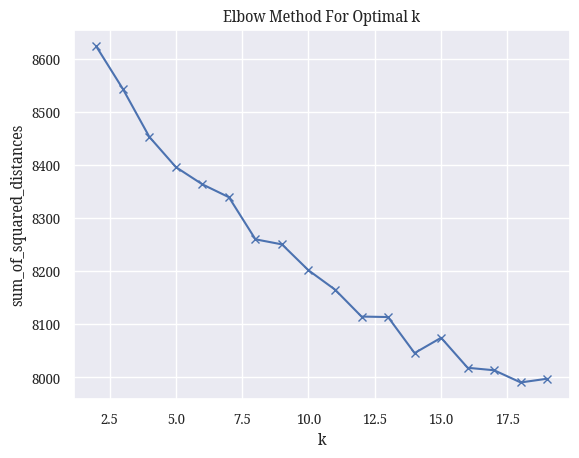

In [68]:
err = []
start_k=2
max_k=20

for k in range(start_k, max_k):
    km = KMeans(n_clusters=k, max_iter=200, n_init=10).fit(X)
    err.append(km.inertia_)
    
plt.plot([i for i in range(start_k, max_k)], err, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

## K Mean Clustering

In [76]:
true_k=11
km=KMeans(n_clusters=true_k).fit(X)
c=km.cluster_centers_

In [77]:
sorted(Counter(list(km.labels_)).most_common())

[(0, 1626),
 (1, 1119),
 (2, 258),
 (3, 4133),
 (4, 64),
 (5, 910),
 (6, 467),
 (7, 278),
 (8, 122),
 (9, 64),
 (10, 198)]

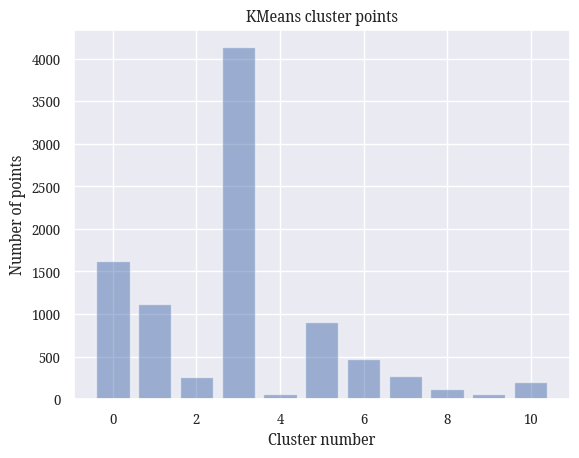

In [93]:
# visually how data points distributed across K clusters 
plt.bar([x for x in range(true_k)], df2.groupby(['cluster'])['message'].count(), alpha = 0.5)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

In [78]:
# get centroid and order 
for i in range(true_k):
    print("cluster:#{}".format(i))
    word_tuples = [(c[i][j], vectorizer.get_feature_names_out()[j]) for j in range(len(c[i]))]
    word_tuples.sort(reverse=True)
    print(' '.join([str(j) for i,j in word_tuples[:10]]))
    print("-----")

cluster:#0
ไม แต กัญชา วา กัญชาเสรี เสรี คน ผา สุรา กวา
-----
cluster:#1
กัญชา พันลำ กัญชานอก กัญชากรุงเทพ กัญชาออแกนิค ดอก ขาย กัญชานนทบุรี กัญชารังสิต กัญชากทม
-----
cluster:#2
รัชดา จังหวัด กัญชา โชค ชัย ตาง ขาย พันลำ กัญชาออแกนิค ลาดพร้าว
-----
cluster:#3
กัญชา กัญชาเสรี เพือ ไม เมา ผม อนุทิน วา ขาว คน
-----
cluster:#4
แคป ชัน ทัก เด็ด ซึมเศร้า โรค สนใจ ไลน์ ไฟฟ้า น้ำมัน
-----
cluster:#5
กัญชา สง ขีด กัญชาอัดแทง กัญชากรุงเทพ ราคา ไลน์ กัญชาออแกนิค อัด มือ
-----
cluster:#6
กัญชา กัญชาเชียงใหม กัญชาพัทยา กัญชากรุงเทพ กัญชาลาดกระบัง สง กัญชารามคำแหง ราคา ซื้อ สัง
-----
cluster:#7
เชียง ใหม กัญชาเชียงใหม นัด กัญชา กัญชาออแกนิค ดอก ติด สง สินค้า
-----
cluster:#8
เสรีกัญชา ไฟฟ้า บุ แต ไทย ไม รี กัญชา กัญชาเสรี เสรี
-----
cluster:#9
อน แนน งบ การันตี นครพนม รีบ แห้ ฉำไม มดี กอ
-----
cluster:#10
รังสิต คลอง กรุงเทพ กัญชา หลวง มอ กัญชารังสิต สง นคร ไท
-----


In [79]:
result={'cluster':km.labels_, 'message':df['clean_token_tweet']}
df2=pd.DataFrame(result)

In [80]:
df2.sample(5)

cluster  \
238         4   
7835        1   
6926        3   
8583        3   
9230        3   

                                                                                                                                                                                                               message  
238                                                                       สนใจ สัง สินค้า ทัก ไลน์ กด ได้ที นี แอด พันลำ อืน สนใจ ทัก ไลน์ กัญชา แคป ชัน บุ รี ไฟฟ้า น้ำมัน กัญชา แคป ชัน ออ แคป ชัน เด็ด โรค ซึมเศร้า  
7835  ความสูง ซม ลิ ผลไม้ รส หวาน ผอน คลาย กระตุ้น สมอง ความคิดสร้างสรรค์ กัญชาขอนแกน คา เฟ กัญชา กัญชาเสรี กัญชานอก สายเขียว กัญชาออแกนิค กัญชา กัญชา โคราช กัญชา อุดร กัญชา สาร คาม กัญชา กระ บี กัญชา สกลนคร ภูเก็ต  
6926                                                                                                                                                  ปชช. ยืน หนุน ราง พ.ร.บ. กัญชา หมอ ระ วี ใจ พรรค ชวย โหวต ผา นแน  
8583                                                                                                                                                                         เมจิก ฟาร์ม เฟรช น้ำผลไม้ ผสม น้ำ ใบกัญชา  
9230                                                                                                                                                         ยามเช้า กัญชาการแพทย์ ประเภท กม ธ. เสน อป ลูกบ้าน สิบ ต้น

## Significant(closest) text in cluster

In [102]:
len(km.labels_)

9239

In [112]:
# for cluster in set(list(km.labels_)):
#     selected=np.array([km.labels_ == 4])
#     X1=X.todense()
#     X2=X1.T * selected.T 
#     break

## WordCloud

In [81]:
!ls ./THSarabunNew/THSarabunNew.ttf

./THSarabunNew/THSarabunNew.ttf


In [82]:
path = './THSarabunNew/THSarabunNew.ttf'

In [83]:
regexp = r"[ก-๙a-zA-Z']+"

In [84]:
backup_df2=df2.copy()

In [85]:
# relative_scalingfloat (default=’auto’)
# Importance of relative word frequencies for font-size. 
# With relative_scaling=0, only word-ranks are considered. 
# With relative_scaling=1, a word that is twice as frequent will have twice the size. 
# If you want to consider the word frequencies and not only their rank, relative_scaling around .5 often looks good. 
# If ‘auto’ it will be set to 0.5 unless repeat is true, in which case it will be set to 0.

Cluster: 0


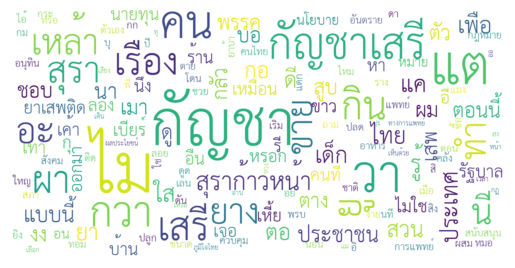

Cluster: 1


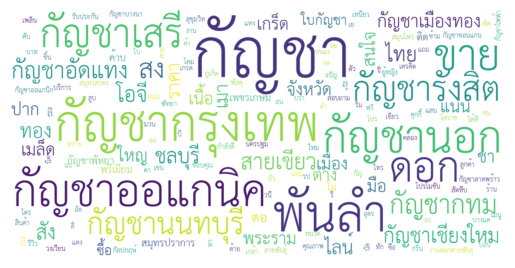

Cluster: 2


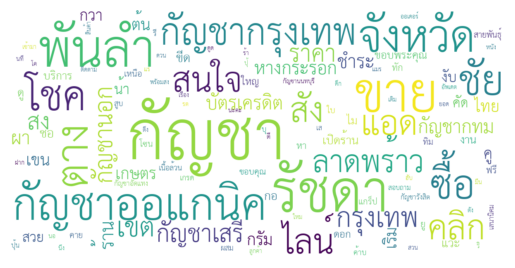

Cluster: 3


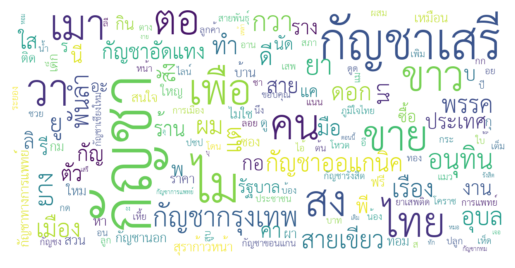

Cluster: 4


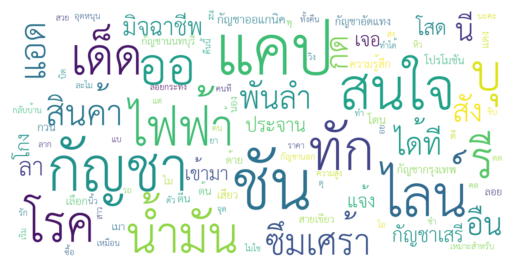

Cluster: 5


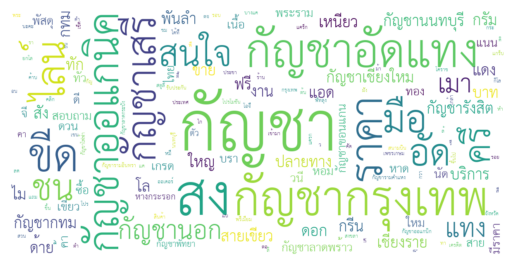

Cluster: 6


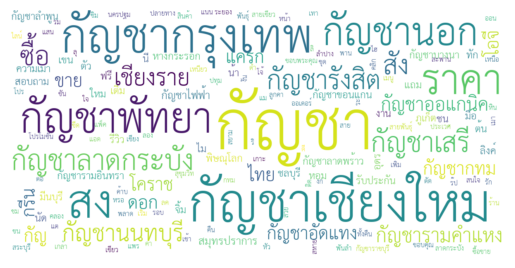

Cluster: 7


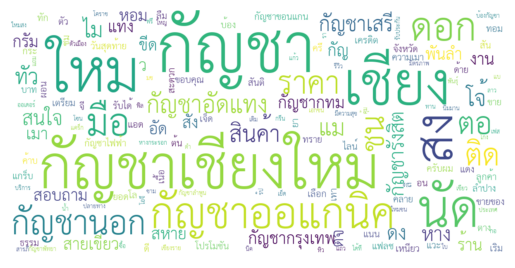

Cluster: 8


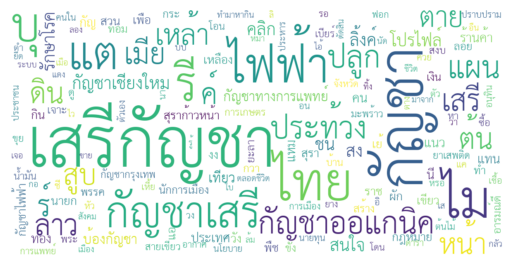

Cluster: 9


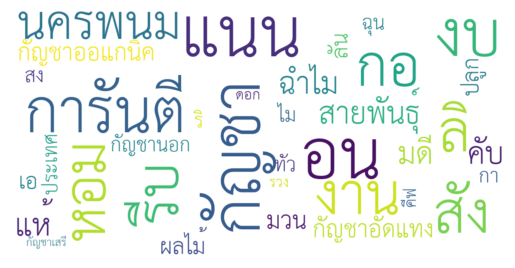

Cluster: 10


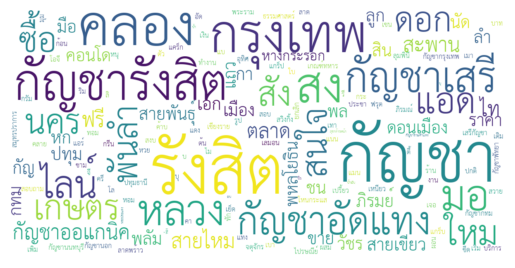

In [86]:
for k in range(0, true_k):
    s=df2[df2.cluster==k]
    text=s['message'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split()])
    wordcloud = WordCloud(font_path=path, 
                          relative_scaling=0.3,
                          max_font_size=80, 
                          max_words=150, 
                          min_font_size=2,
                          background_color="white",
                          collocations=False,
                          scale=3,
                          font_step=4,
                          regexp=regexp,
                          margin=2
                         ).generate(text)
    print('Cluster: {}'.format(k))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

# Interpretation

## Cluster visualization

In [88]:
df2['tfidf'] = (
    df2['message']
    .pipe(hero.clean)
    .pipe(hero.tfidf)
)

In [89]:
X=df2['tfidf']
if isinstance(X, pd.DataFrame):
    input_matrix_coo = X.sparse.to_coo()
    input_matrix_for_vectorization = input_matrix_coo.astype("float64")
else:
    input_matrix_for_vectorization = list(X)

In [90]:
desierd_clusters=10

In [91]:
km = KMeans(n_clusters=desierd_clusters, max_iter=200, n_init=10)
model = km.fit(input_matrix_for_vectorization)

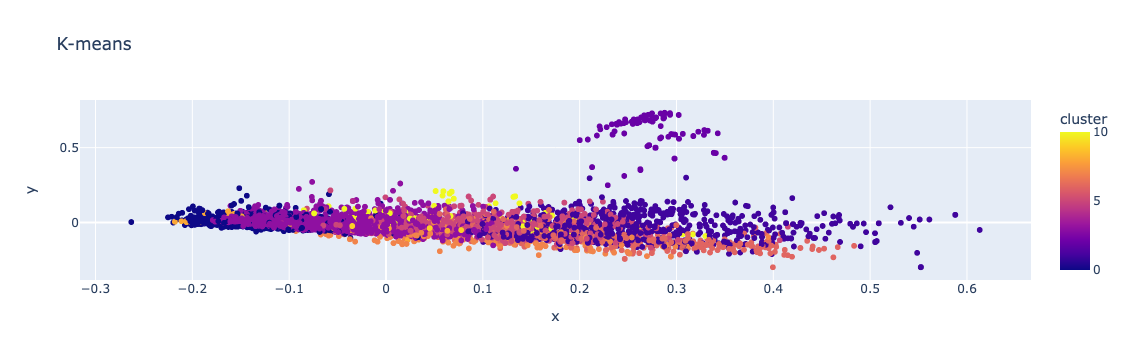

In [92]:
df2['pca'] = df2['tfidf'].pipe(hero.pca)
hero.scatterplot(df2, 'pca', color='cluster', title="K-means")

In [100]:
df2[df2['cluster']==2]['message'][:5]

21    สง หางกระรอก ไทย ขีด เขต กรุงเทพ ตาง จังหวัด ตาง จังหวัด สนใจ สัง ซื้อ แอด ไลน์ คลิก กัญชา กัญชา กัญชากทม กัญชาออแกนิค รัชดา ลาดพร้าว ขาย กัญชา พันลำ ขาย สง กัญชา
27       หางกระรอก ไทย ขีด เขต กรุงเทพ ตาง จังหวัด ตาง จังหวัด สนใจ สัง ซื้อ แอด ไลน์ คลิก กัญชา กัญชา กัญชากทม กัญชาออแกนิค รัชดา ลาดพร้าว ขาย กัญชา พันลำ ขาย สง กัญชา
28                                 ซื้อ คู กวา ร้าน ชำระ ผา บัตรเครดิต กัญชา กัญชาออแกนิค กัญชาเสรี กัญชา ราคา กัญชานอก พันลำ ขาย กัญชา กัญชากรุงเทพ รัชดา รัชดา โชค ชัย
29                                 ซื้อ คู กวา ร้าน ชำระ ผา บัตรเครดิต กัญชา กัญชาออแกนิค กัญชาเสรี กัญชา ราคา กัญชานอก พันลำ ขาย กัญชา กัญชากรุงเทพ รัชดา รัชดา โชค ชัย
30                                 ซื้อ คู กวา ร้าน ชำระ ผา บัตรเครดิต กัญชา กัญชาออแกนิค กัญชาเสรี กัญชา ราคา กัญชานอก พันลำ ขาย กัญชา กัญชากรุงเทพ รัชดา รัชดา โชค ชัย
Name: message, dtype: object

## Extract keywords in each cluster

In [78]:
clusters=sorted(df2['cluster'].unique().tolist())

In [80]:
# This function summarizes text based on frequency of words.

for i in clusters:
    tmp=[]
    df2[df2['cluster']==i]['message'].apply(lambda x: tmp.append(x))
    sentence=' '.join(tmp)
    paragraph=sent_tokenize(sentence, engine="whitespace+newline")
    kw = find_keyword(paragraph, min_len=1)
    top10_kw = sorted(kw.items(), key=lambda item: item[1], reverse=True)[0:10]
    summary=summarize(sentence, n=1)
    print("cluster: {}".format(i))
    print(top10_kw)
    print(summary)
    print("-"*20)

[('แคป', 199), ('ชัน', 199), ('กัญชา', 126), ('ไลน์', 94), ('สนใจ', 93), ('ทัก', 90), ('เด็ด', 62), ('ออ', 61), ('บุ', 57), ('รี', 57)]
['กัญชาออแกนิค']
----------
[('กัญชา', 680), ('ไม', 273), ('ขาว', 238), ('เพือ', 228), ('อนุทิน', 214), ('พรรค', 157), ('กัญชาเสรี', 141), ('ราง', 139), ('พ.ร.บ.', 113), ('การแพทย์', 113)]
['ไม']
----------
[('กัญชา', 2855), ('กัญชาเสรี', 395), ('ไม', 342), ('วา', 310), ('คน', 238), ('เมา', 228), ('แต', 218), ('อุบล', 208), ('ขาย', 207), ('สง', 199)]
['กัญชาเสรี']
----------
[('กัญชา', 819), ('รัชดา', 386), ('ขาย', 308), ('พันลำ', 262), ('กัญชาออแกนิค', 257), ('ตาง', 254), ('จังหวัด', 254), ('โชค', 187), ('ชัย', 187), ('ซื้อ', 169)]
['กัญชาออแกนิค']
----------
[('กัญชา', 642), ('รังสิต', 590), ('คลอง', 252), ('กรุงเทพ', 201), ('กัญชารังสิต', 168), ('สง', 153), ('มอ', 126), ('กัญชาเสรี', 125), ('หลวง', 121), ('กัญชาอัดแทง', 118)]
['กัญชารังสิต']
----------
[('กัญชา', 4693), ('กัญชากรุงเทพ', 863), ('สง', 710), ('กัญชาออแกนิค', 670), ('กัญชาเสรี', 636), (

## Topic Modeling - LDA(Latent Dirichlet Allocation)

In [81]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from collections import defaultdict

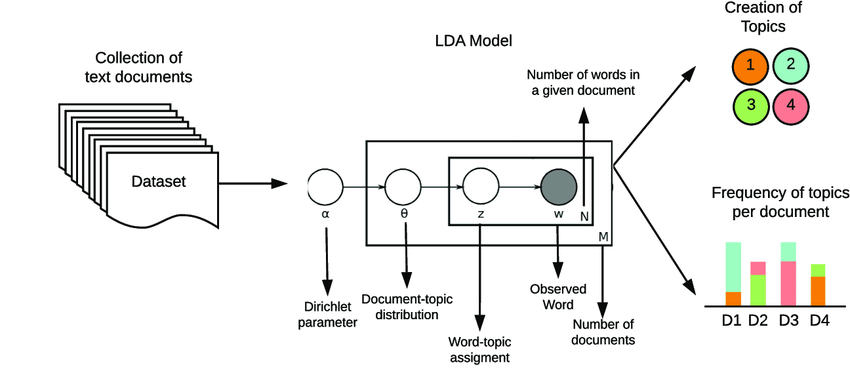

In [ ]:
# df2['message'][:10].map(str.split)

In [101]:
stoplist = set('for a of the and to in'.split())

texts = [
    [word for word in document.lower().split() if word not in stoplist]
    for document in df2['message']
]

# remove words that appear only once
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

texts = [
    [token for token in text if frequency[token] > 1]
    for text in texts
]
corpus = [dictionary.doc2bow(text) for text in texts]

In [102]:
from gensim import models

tfidf = models.TfidfModel(corpus)  # step 1 -- initialize a model

In [103]:
doc_bow = [(0, 1), (1, 1)]
print(tfidf[doc_bow])  # step 2 -- use the model to transform vectors

[(0, 0.7347240238094676), (1, 0.6783661318471206)]


In [104]:
corpus_tfidf = tfidf[corpus]
for doc in corpus_tfidf:
    print(doc)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [105]:
lsi_model = models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=10)  # initialize an LSI transformation
corpus_lsi = lsi_model[corpus_tfidf]  # create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi

In [110]:
for idx, topic in lsi_model.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.243*"กัญชา" + 0.241*"พันลำ" + 0.222*"กัญชาออแกนิค" + 0.222*"กัญชากรุงเทพ" + 0.219*"สง" + 0.208*"กัญชานอก" + 0.189*"ขาย" + 0.181*"กัญชาเชียงใหม" + 0.179*"กัญชาเสรี" + 0.174*"ราคา"
Topic: 1 Word: 0.448*"รัชดา" + 0.267*"จังหวัด" + 0.252*"โชค" + 0.243*"ตาง" + 0.242*"ชัย" + -0.206*"กัญชาเชียงใหม" + 0.166*"พันลำ" + 0.158*"เขต" + 0.155*"ลาดพร้าว" + 0.147*"คลิก"
Topic: 2 Word: 0.356*"รังสิต" + 0.248*"กรุงเทพ" + 0.224*"จังหวัด" + -0.214*"รัชดา" + -0.206*"กัญชาเสรี" + 0.197*"ตาง" + 0.184*"คลอง" + 0.183*"แอด" + 0.180*"ไลน์" + -0.180*"ผา"
Topic: 3 Word: 0.387*"ไม" + 0.286*"แต" + 0.195*"วา" + 0.153*"เสรี" + 0.153*"คน" + 0.137*"ผา" + -0.131*"กัญชาเชียงใหม" + 0.131*"กวา" + 0.126*"สุรา" + -0.125*"กัญชานอก"
Topic: 4 Word: -0.503*"รังสิต" + 0.277*"จังหวัด" + 0.264*"ตาง" + -0.242*"คลอง" + -0.219*"กัญชาเสรี" + -0.168*"หลวง" + 0.153*"กัญชาเชียงใหม" + -0.137*"มอ" + 0.113*"เขต" + 0.112*"เมล็ด"
Topic: 5 Word: 0.342*"กัญชา" + 0.307*"พันลำ" + -0.237*"กัญชาเชียงใหม" + -0.223*"เชียง" + -0.221*"ให

### Lets create Topics

- Topic 0: กัญชาส่งขาย/ติดต่อ/ช่องทาง/ไลน์
- Topic 1: กัญชาตามเขต/จังหวัด
- Topic 2: กัญชาและสุราเสรี 
- Topic 3: คุณภาพกัญชา 

# Ref.

- https://medium.com/@cheng3374/nlp-เบื้องต้น-e5886e8d46b6
- https://blog.pjjop.org/intro-to-nlp-for-air/
- https://www.bualabs.com/archives/2952/what-is-stemming-what-is-lemmatization-different-stemming-lemmatization-nlp-ep-3/
- https://blog.pjjop.org/intro-to-nlp-for-air/
- https://medium.com/homedottech/ใช้lda-topic-modeling-เพื่อแบ่งกลุ่มผู้ใช้เวปไซต์-ตามความสนใจ-294abfc48cd8
- https://kongruksiam.medium.com/สรุป-machine-learning-ep-5-การวิเคราะห์องค์ประกอบหลัก-pca-185c29aa8954